In [1]:
import numpy as np
import pandas as pd

In [2]:
# Imported Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import chi2

In [3]:
data = pd.read_csv(r"C:\Users\admin\Downloads\Online Payments Fraud Detection Dataset Sample.csv")

In [4]:
data.head()

step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
3     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
4     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0   C553264065             0.0             0.0        1               0  
1    C38997010         21182.0             0.0        1               0  
2   C972765878             0.0             0.0        1               0  
3  C1007251739         26202.0             0.0        1               0  
4  C1848415041             0.0             0.0        1               0

In [6]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
data.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  643640.000000  6.436400e+05   6.436400e+05    6.436400e+05   
mean      244.991171  1.954349e+05   8.328915e+05    8.370284e+05   
std       144.174147  6.717458e+05   2.872258e+06    2.889793e+06   
min         1.000000  0.000000e+00   0.000000e+00    0.000000e+00   
25%       156.000000  1.348544e+04   0.000000e+00    0.000000e+00   
50%       249.000000  7.654455e+04   1.483700e+04    0.000000e+00   
75%       345.000000  2.120862e+05   1.136017e+05    1.391850e+05   
max       743.000000  6.988673e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    6.436400e+05    6.436400e+05  643640.000000   643640.000000  
mean     1.094427e+06    1.227948e+06       0.012745        0.000009  
std      3.346115e+06    3.652183e+06       0.112171        0.003053  
min      0.000000e+00    0.000000e+00       0.000000        0.000000  
25%      0.000000e+00    0.000000e+00       0.000000        0.000000  
50%      1.260584e+05    2.121885e+05       0.000000        0.000000  
75%      9.322675e+05    1.113922e+06       0.000000        0.000000  
max      2.496098e+08    2.916677e+08       1.000000        1.000000

In [5]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [7]:
data[['isFlaggedFraud']].value_counts()

isFlaggedFraud
0                 643634
1                      6
dtype: int64

In [8]:
data[['isFraud']].value_counts()

isFraud
0          635437
1            8203
dtype: int64

In [10]:
#EDA
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

In [9]:
#understanding the transaction type
print(data.type.value_counts())

CASH_OUT    227000
PAYMENT     216016
CASH_IN     139073
TRANSFER     57235
DEBIT         4316
Name: type, dtype: int64


<AxesSubplot:xlabel='step', ylabel='Density'>

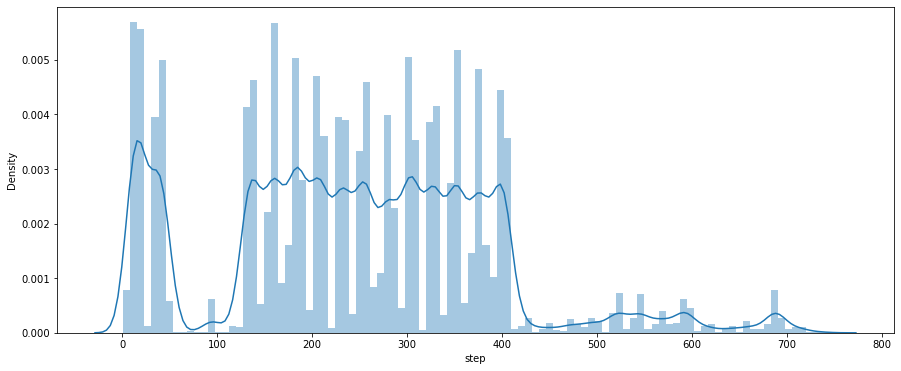

In [12]:
plt.figure(figsize=(15,6))
sns.distplot(data['step'],bins=100)

In [14]:
fl = data.select_dtypes(include = ['object'])
fl

type     nameOrig     nameDest
0       TRANSFER  C1305486145   C553264065
1       CASH_OUT   C840083671    C38997010
2       TRANSFER  C1420196421   C972765878
3       CASH_OUT  C2101527076  C1007251739
4       TRANSFER   C137533655  C1848415041
...          ...          ...          ...
643635   CASH_IN  C1036720721  C1038100083
643636  CASH_OUT     C3205307   C630192377
643637   PAYMENT  C1979091193  M1180828053
643638   PAYMENT   C672341124   M759802248
643639   PAYMENT  C1271834128  M1561909500

[643640 rows x 3 columns]

In [8]:
nu =data.select_dtypes(include = ['int','float']) 
nu

step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0          1     181.00         181.00            0.00            0.00   
1          1     181.00         181.00            0.00        21182.00   
2          1    2806.00        2806.00            0.00            0.00   
3          1    2806.00        2806.00            0.00        26202.00   
4          1   20128.00       20128.00            0.00            0.00   
...      ...        ...            ...             ...             ...   
643635   305   71793.27     6370707.11      6442500.38       915463.67   
643636   374  163910.64      203342.00        39431.36       283362.70   
643637   259    1387.76      213331.59       211943.83            0.00   
643638   249     591.70      100954.00       100362.30            0.00   
643639   346     725.50       36120.00        35394.50            0.00   

        newbalanceDest  isFraud  isFlaggedFraud  
0                 0.00        1               0  
1                 0.00        1               0  
2                 0.00        1               0  
3                 0.00        1               0  
4                 0.00        1               0  
...                ...      ...             ...  
643635       843670.41        0               0  
643636       447273.34        0               0  
643637            0.00        0               0  
643638            0.00        0               0  
643639            0.00        0               0  

[643640 rows x 8 columns]

In [6]:
data[['nameOrig']].value_counts()

nameOrig   
C819949079     2
C648580163     2
C142721306     2
C1821339560    2
C406489421     2
              ..
C1643876265    1
C1643878692    1
C1643885768    1
C1643889436    1
C999999784     1
Length: 643539, dtype: int64

In [123]:
## Feature Engineering
# from plotly import express as px
# import plotly.graph_objects as go
# fig = go.Figure(px.box(data, y = 'step', title = 'Box Plot of Step'))
# fig.update_layout(title_x=0.5)
# fig.show()

In [11]:
nu

step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0          1     181.00         181.00            0.00            0.00   
1          1     181.00         181.00            0.00        21182.00   
2          1    2806.00        2806.00            0.00            0.00   
3          1    2806.00        2806.00            0.00        26202.00   
4          1   20128.00       20128.00            0.00            0.00   
...      ...        ...            ...             ...             ...   
643635   305   71793.27     6370707.11      6442500.38       915463.67   
643636   374  163910.64      203342.00        39431.36       283362.70   
643637   259    1387.76      213331.59       211943.83            0.00   
643638   249     591.70      100954.00       100362.30            0.00   
643639   346     725.50       36120.00        35394.50            0.00   

        newbalanceDest  isFraud  isFlaggedFraud  
0                 0.00        1               0  
1                 0.00        1               0  
2                 0.00        1               0  
3                 0.00        1               0  
4                 0.00        1               0  
...                ...      ...             ...  
643635       843670.41        0               0  
643636       447273.34        0               0  
643637            0.00        0               0  
643638            0.00        0               0  
643639            0.00        0               0  

[643640 rows x 8 columns]

In [125]:
# fig = go.Figure(px.box(data, y = 'oldbalanceOrg', title = 'Box Plot of oldbalanceOrg'))
# fig.update_layout(title_x=0.5)
# fig.show()

In [124]:
# fig = go.Figure(px.histogram(data, x = 'amount', title = 'Histogram of amount'))
# fig.update_layout(title_x=0.05)
# fig.show()

<AxesSubplot:>

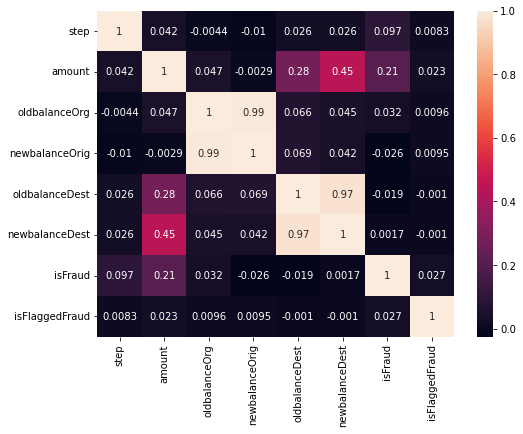

In [19]:
# Checking correlation
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot=True)

Text(0.5, 1.0, 'Class Distributions \n (0: Good || 1: Bad)')

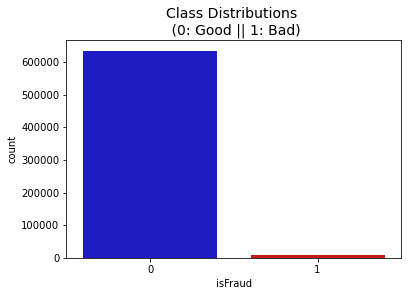

In [20]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('isFraud', data=data, palette=colors)
plt.title('Class Distributions \n (0: Good || 1: Bad)', fontsize=14)

In [22]:
data[['isFraud']].value_counts()

isFraud
0          635437
1            8203
dtype: int64

In [23]:
df = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['isFraud'] == 1]
non_fraud_df = df.loc[df['isFraud'] == 0][:8203]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: isFraud, dtype: float64


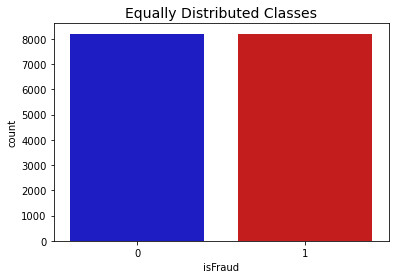

In [25]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['isFraud'].value_counts()/len(new_df))

sns.countplot('isFraud', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [26]:
ob = new_df.select_dtypes(include = 'object')
ob

type     nameOrig     nameDest
6128    TRANSFER   C171758172  C1650736473
488225   CASH_IN  C1443429607  C1560432279
5041    TRANSFER   C105750198  C1172379830
93424    CASH_IN  C1411229466  C1456222373
4070    TRANSFER   C794947414  C1309662059
...          ...          ...          ...
460385   PAYMENT  C2139458302  M1225050099
303173  CASH_OUT  C1793476925   C736571621
1243    CASH_OUT   C209849944   C580913459
5137    TRANSFER   C847706686   C719419922
21509    CASH_IN   C377021627  C1769166725

[16406 rows x 3 columns]

In [27]:
fl = new_df.select_dtypes(include = ['int64','float64'])
fl

step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
6128     557    74709.40       74709.40            0.00            0.00   
488225   360   395512.56     5265536.33      5661048.89       591015.03   
5041     450   422261.63      422261.63            0.00            0.00   
93424    357   152653.44     2148484.05      2301137.49       271515.27   
4070     365  4841332.26     4841332.26            0.00            0.00   
...      ...         ...            ...             ...             ...   
460385   162     2769.92      410098.00       407328.08            0.00   
303173   354    67923.92        5081.00            0.00            0.00   
1243     105    40413.81       40413.81            0.00            0.00   
5137     460   440962.56      440962.56            0.00            0.00   
21509    299   219171.52      285845.00       505016.52       317727.24   

        newbalanceDest  isFraud  isFlaggedFraud  
6128              0.00        1               0  
488225       195502.47        0               0  
5041              0.00        1               0  
93424        118861.83        0               0  
4070              0.00        1               0  
...                ...      ...             ...  
460385            0.00        0               0  
303173        67923.92        0               0  
1243          40413.81        1               0  
5137              0.00        1               0  
21509         98555.73        0               0  

[16406 rows x 8 columns]

In [28]:
######## Correlation between independent varibles
corr = fl.corr()
corr
#remove one of two features that have a correlation higher than 0.7
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = fl.columns[columns]
fl = fl[selected_columns]

In [29]:
fl

step      amount  oldbalanceOrg  oldbalanceDest  isFraud  \
6128     557    74709.40       74709.40            0.00        1   
488225   360   395512.56     5265536.33       591015.03        0   
5041     450   422261.63      422261.63            0.00        1   
93424    357   152653.44     2148484.05       271515.27        0   
4070     365  4841332.26     4841332.26            0.00        1   
...      ...         ...            ...             ...      ...   
460385   162     2769.92      410098.00            0.00        0   
303173   354    67923.92        5081.00            0.00        0   
1243     105    40413.81       40413.81            0.00        1   
5137     460   440962.56      440962.56            0.00        1   
21509    299   219171.52      285845.00       317727.24        0   

        isFlaggedFraud  
6128                 0  
488225               0  
5041                 0  
93424                0  
4070                 0  
...                ...  
460385               0  
303173               0  
1243                 0  
5137                 0  
21509                0  

[16406 rows x 6 columns]

In [30]:
## one-hot encoding
cat_col = ob.columns
# convert all cols to numeric 
ob[cat_col] = ob[cat_col].apply(lambda x: pd.factorize(x)[0])

In [31]:
ob

type  nameOrig  nameDest
6128       0         0         0
488225     1         1         1
5041       0         2         2
93424      1         3         3
4070       0         4         4
...      ...       ...       ...
460385     3     16401     16233
303173     2     16402     16234
1243       2     16403     16235
5137       0     16404     16236
21509      1     16405     16237

[16406 rows x 3 columns]

In [32]:
dat = pd.concat([ob,fl],1)
dat

type  nameOrig  nameDest  step      amount  oldbalanceOrg  \
6128       0         0         0   557    74709.40       74709.40   
488225     1         1         1   360   395512.56     5265536.33   
5041       0         2         2   450   422261.63      422261.63   
93424      1         3         3   357   152653.44     2148484.05   
4070       0         4         4   365  4841332.26     4841332.26   
...      ...       ...       ...   ...         ...            ...   
460385     3     16401     16233   162     2769.92      410098.00   
303173     2     16402     16234   354    67923.92        5081.00   
1243       2     16403     16235   105    40413.81       40413.81   
5137       0     16404     16236   460   440962.56      440962.56   
21509      1     16405     16237   299   219171.52      285845.00   

        oldbalanceDest  isFraud  isFlaggedFraud  
6128              0.00        1               0  
488225       591015.03        0               0  
5041              0.00        1               0  
93424        271515.27        0               0  
4070              0.00        1               0  
...                ...      ...             ...  
460385            0.00        0               0  
303173            0.00        0               0  
1243              0.00        1               0  
5137              0.00        1               0  
21509        317727.24        0               0  

[16406 rows x 9 columns]

In [33]:
# Spliting dataset 
X = dat.drop('isFraud',1)
y = dat[['isFraud']]

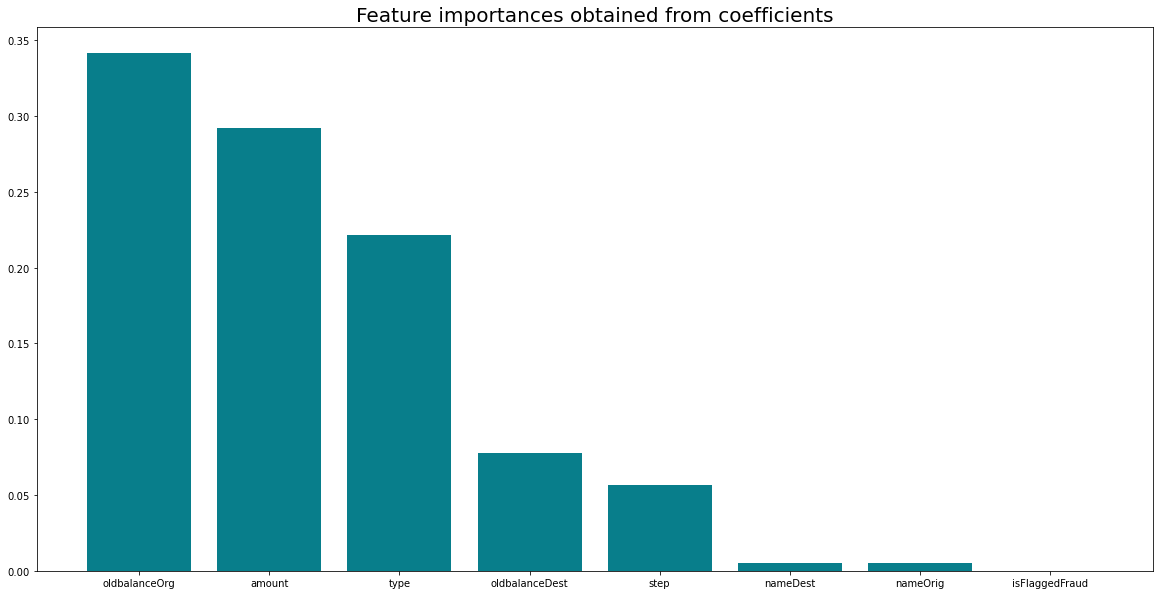

In [54]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X,y)
# get importance
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by = 'Importance', ascending = False)
plt.figure(figsize =(20,10))
plt.bar(x = importances['Attribute'],height = importances['Importance'], color ='#087E8B')
plt.title('Feature importances obtained from coefficients', size = 20)
plt.show()

In [81]:
importances.loc[importances['Importance']>0.005]

Attribute  Importance
5   oldbalanceOrg    0.341613
4          amount    0.291914
0            type    0.221820
6  oldbalanceDest    0.077552
3            step    0.056801
2        nameDest    0.005250
1        nameOrig    0.005051

In [82]:
df = dat[['oldbalanceOrg', 'amount', 'type', 'oldbalanceDest', 'step', 'nameDest' ,'nameOrig','isFraud']]

In [83]:
# Spliting dataset 
X = df.drop('isFraud',1)
y = df[['isFraud']]

In [84]:
from sklearn.model_selection import train_test_split

ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size = 0.2, stratify = y, shuffle = True,
                                                                       random_state = 0)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (13124, 7)
X_test shape:  (3282, 7)
y_train shape:  (13124, 1)
y_test shape:  (3282, 1)


In [35]:
# import the library - GridSearchCv
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [36]:
## Using StandardScaler and PCA
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

In [37]:
## Using Pipeline for GridSearchCV
pipe = Pipeline(steps = [('std_slc',std_slc),('pca',pca),('dec_tree',dec_tree)])
# n_components signifies the number of components to keep after reducing the dimension
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini','entropy']
max_depth = [6,8,10,12]
parameters = dict(pca__n_components=n_components,
                  dec_tree__criterion = criterion, 
                  dec_tree__max_depth = max_depth)

In [38]:
n_components = list(range(1,X.shape[1]+1,1))

In [85]:
## Using GridSearchCV and printing results
clf_GS = GridSearchCV(pipe,parameters)
clf_GS.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8]})

In [86]:
print('Best Criterion:',clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:',clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number of Components:',clf_GS.best_estimator_.get_params()['pca__n_components'])
print();print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 12
Best Number of Components: 6

DecisionTreeClassifier(criterion='entropy', max_depth=12)


In [87]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)
# fit the model
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)

In [88]:
## Predict on the Validation set
y_pred_entropy = clf_entropy.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))
y_pred_train_entropy = clf_entropy.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_entropy)))

Model accuracy score with criterion entropy index: 0.9717
Training-set accuracy score: 0.9800


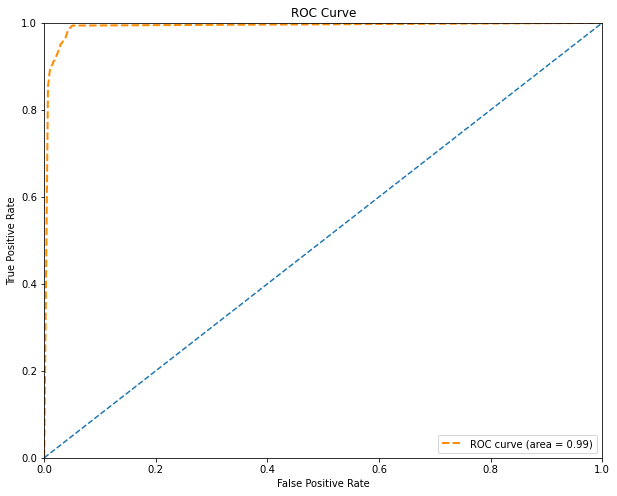

In [90]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_test = clf_entropy.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)

In [96]:
from sklearn import tree
plt.figure(figsize=(200,90))
tree.plot_tree(clf_entropy.fit(X_train, y_train)) 

[Text(4912.725, 4704.230769230769, 'X[0] <= 53289.154\nentropy = 1.0\nsamples = 13124\nvalue = [6562, 6562]'),
 Text(2881.4500000000003, 4327.892307692307, 'X[1] <= 53144.545\nentropy = 0.648\nsamples = 5285\nvalue = [4409, 876]'),
 Text(1038.5, 3951.553846153846, 'X[2] <= 2.5\nentropy = 0.87\nsamples = 2948\nvalue = [2091, 857]'),
 Text(939.3000000000001, 3575.215384615384, 'X[0] <= 144.5\nentropy = 0.928\nsamples = 1306\nvalue = [449, 857]'),
 Text(297.6, 3198.876923076923, 'X[1] <= 270.46\nentropy = 0.426\nsamples = 242\nvalue = [221, 21]'),
 Text(198.4, 2822.5384615384614, 'entropy = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(396.8, 2822.5384615384614, 'X[4] <= 15.5\nentropy = 0.042\nsamples = 222\nvalue = [221, 1]'),
 Text(297.6, 2446.2, 'X[6] <= 1610.0\nentropy = 0.414\nsamples = 12\nvalue = [11, 1]'),
 Text(198.4, 2069.861538461538, 'X[1] <= 41811.266\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(99.2, 1693.523076923077, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Te

In [91]:
## Logistic Regression
logit_model = LogisticRegression(solver = 'lbfgs', max_iter=1000, fit_intercept=True, tol=0.0001, C=1, penalty='l2')
logit_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [92]:
from sklearn.metrics import accuracy_score

y_pred_train = logit_model.predict(X_train)
acc_train = accuracy_score(y_pred_train, y_train)
y_pred_test = logit_model.predict(X_test)
acc_test = accuracy_score(y_pred_test, y_test)

print('accuracy on train: ', acc_train)
print('accuracy on test: ', acc_test)

accuracy on train:  0.7328558366351722
accuracy on test:  0.7233394271785497


In [93]:
print(logit_model.coef_, logit_model.intercept_)

[[-2.49760846e-07  2.12024148e-06 -1.22366429e-08 -1.73924939e-07
   1.13743166e-09 -2.61564558e-05 -2.64532220e-05]] [-3.23256513e-09]


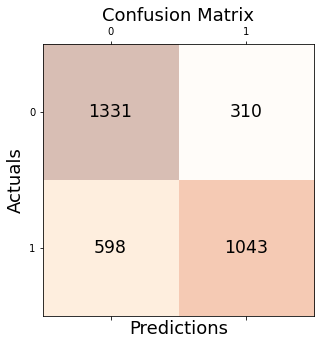

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [122]:
print('Precision: %.3f' % precision_score(y_test, y_pred_gini))
print('Recall: %.3f' % recall_score(y_test, y_pred_gini))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_gini))

Precision: 0.949
Recall: 0.995
F1 Score: 0.971


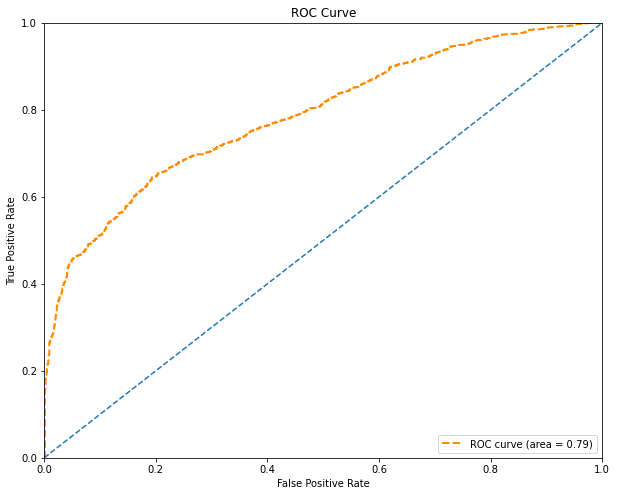

In [94]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_test = logit_model.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)

In [97]:
# Random Forest
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [106]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [107]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [108]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [109]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}  



In [116]:
randmf = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 90, bootstrap=True) 
randmf.fit( X_train, y_train) 

RandomForestClassifier(max_depth=90)

In [117]:
## Predict on the Validation set
y_pred_cf = randmf.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_cf)))
y_pred_train_cf = randmf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_cf)))

Model accuracy score with criterion entropy index: 0.9778
Training-set accuracy score: 1.0000


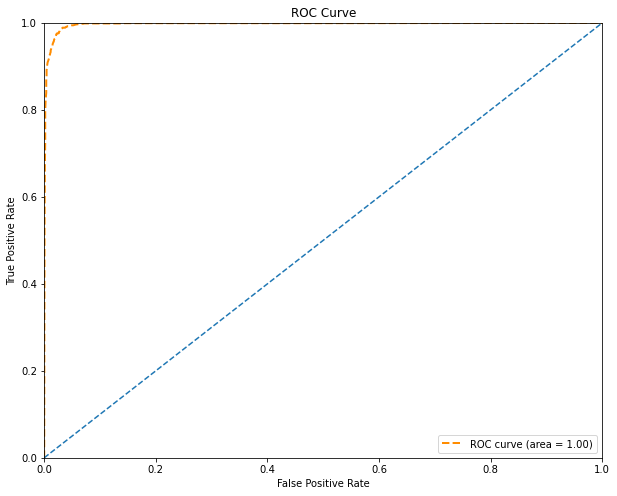

In [119]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_test = randmf.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)